In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Load data
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
# Drop rows containing null values.
df.dropna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
# Drop columns.
df.drop(columns=['Id'], inplace=True)

# drop species column

df = df.set_index('Species')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, Iris-setosa to Iris-virginica
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 5.9+ KB


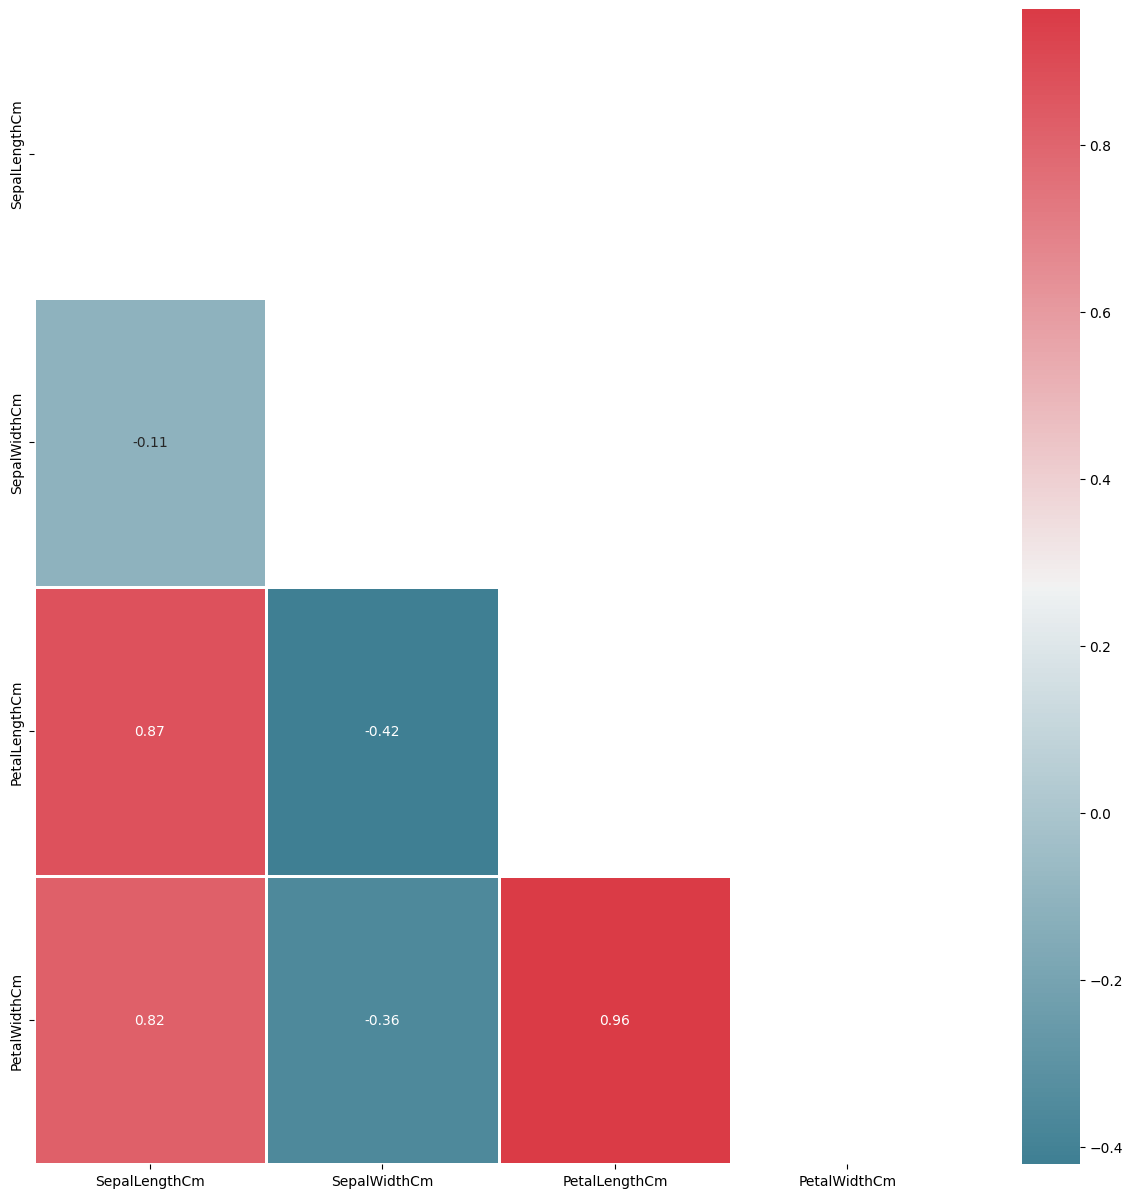

In [28]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
    # get correlations
    corrs = df.corr()

    fig, ax = plt.subplots(figsize=(15, 15))

    # to mask mirrored side of heatmap
    dropSelf = np.zeros_like(corrs)
    dropSelf[np.triu_indices_from(dropSelf)] = True

    # Generate Heat Map
    ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

    plt.show()

corr_heatmap(df)

In [30]:
# Scale data
X = StandardScaler().fit_transform(df.values)
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [31]:
# Apply PCA to scaled data with n_components = 3
pca = PCA(n_components=3)

# obtain components
principal_components = pca.fit_transform(X)

pca_df = pd.DataFrame(principal_components, index=df.index)

pca_df.head()


,0,1,2
Species,,,
Iris-setosa,-2.264542,0.505704,-0.121943
Iris-setosa,-2.086426,-0.655405,-0.227251
Iris-setosa,-2.367950,-0.318477,0.051480
Iris-setosa,-2.304197,-0.575368,0.098860
Iris-setosa,-2.388777,0.674767,0.021428


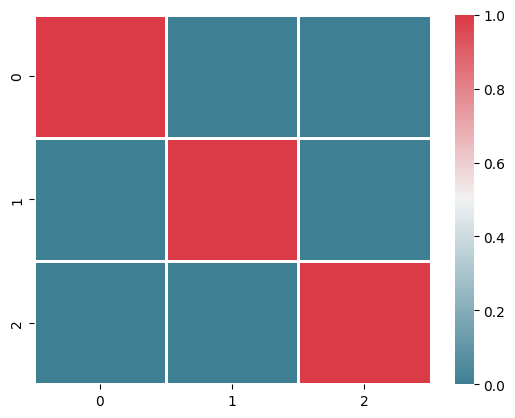

In [33]:
ax = sns.heatmap(pca_df.corr(), cmap=colormap,linewidth=1)
plt.show()

Here the heatmap is smaller and more compact, as redundant features have been removed. The likely features that may have been removed are
either the sepal lengths or width which are likely equivalent. Or the petal width or length may have been removed as they are likely equivalent.

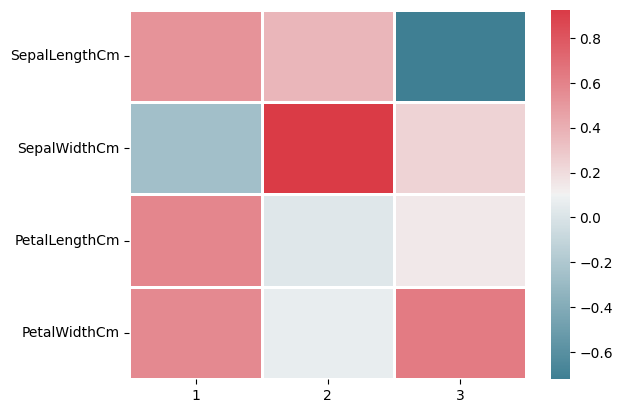

In [34]:
# Heatmap of components with original variables.
components = pd.DataFrame(pca.components_, columns=df.columns, index=range(1, 4)).transpose()
ax = sns.heatmap(components,cmap=colormap,linewidth=1)
plt.show()